<div class="alert alert-success">
    <h1> Exploração, descrição dos dados</h1>
    <h3>Itens</h3>
    <hr>
<input type="checkbox" checked=true>
    <b>Tamanho original da base e relação das colunas</b></input><br>

<input type="checkbox" checked=true>
    <b>Relação de casos duplicados
        - NDUPLIC_N == 2: é duplicado</b></input><br>

<input type="checkbox" checked=true>
<b>Relação de municípios ignorados por estado</b></input><br>

<input type="checkbox" checked=true>
<b>Relação de casos novos confirmados sem CO_MN_INF</b></input><br>

<input type="checkbox" checked=true>
<b>Relação de casos transferidos (GO -> TO)</b></input><br>

<input type="checkbox" checked=true>
<b>Total de casos por tipo de CLASSI_FIN, antes e depois de remover 43 duplicações</b></input><br>

<input type="checkbox" checked=true>
<b>Total de casos confirmados, CLASSI_FIN == 1, por tipo de ENTRADA, antes e depois de remover 43 duplicações
</b></input><br>

<input type="checkbox" checked=true>
<b>Evolução do total de casos novos confirmados, Brasil e Pará, no período</b></input><br>

<input type="checkbox" checked=true>
<b>Ranking dos municípios com taxa de incidência maior que 10 no último triênio</b></input><br>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.max_columns', None)
%matplotlib inline

### Leitura de dados

In [2]:
path_leivis = '../data/interim/leivis/interim_leivis.csv'
path_dicionario = '../data/dicionario.csv'

df = pd.read_csv(path_leivis, low_memory=False).drop('Unnamed: 0', axis=1)

mun = pd.read_csv('../data/processed/processed_municipios.csv')
mun = mun.loc[:, ['ibge_code', 'municipio', 'estado']]
mun.municipio = mun.municipio + ' - ' + mun.estado
mun.drop('estado', axis=1, inplace=True)
mun = mun.set_index('ibge_code').to_dict()['municipio']

# dicionário dos dados: para facilitar consulta apenas
dic = pd.read_csv(path_dicionario, sep='\t')
dic.columns = ['id', 'tipo', 'categorias', 'descricao', 'caracteristicas', 'dbf']
cols = list(set(dic.dbf).intersection(set(df.columns)))
dic = dic.set_index('dbf')
dic = dic.loc[cols, ['categorias', 'descricao', 'caracteristicas']]

### Visualizando a descrição dos dados junto com o dicionário 
corra as células para ver descrição das variáveis

In [3]:
# do tipo objeto
pd.concat([
    df.describe(include='object').T, dic.loc[df.describe(include='object').T.index, :]
], axis=1
)

,count,unique,top,freq,categorias,descricao,caracteristicas
ID_AGRAVO,122502,1,B550,122502,B55.0 – Leishmaniose Visceral,Agravo/doença,NaN
DT_NOTIFIC,122502,4732,2019-09-05,144,NaN,Data da Notificação: data e hora,NaN
DT_SIN_PRI,122502,5093,2019-09-05,114,NaN,Data dos Primeiros Sintomas,NaN
DT_NASC,121218,29430,2006-06-29,24,NaN,Data de Nascimento do Paciente,NaN
CS_SEXO,122502,3,M,74367,\nM - Masculino\nF - Feminino\nI - Ignorado\n,Sexo do paciente,NaN
DT_INVEST,98931,4058,2019-09-05,142,NaN,Data em que ocorreu a investigação – informar a data da 1a visita ao paciente,Campo obrigatório\nData da investigação > ou = data\nda notificação
ID_OCUPA_N,39200,1341,999991.0,7552,NaN,"Informar a atividade exercida pelo paciente\nno setor formal, informal\nou autônomo ou sua última atividade exercida\nquando paciente for desempregado. O ramo\nde atividade econômica do paciente refere-se as\natividades econômicas desenvolvidas nos\nprocessos de produção do setor primário\n(agricultura e extrativismo); secundário\n(indústria) ou terciário\n(serviços e comércio)",NaN
OUTROS_ESP,23364,8217,DOR ABDOMINAL,1641,NaN,Especificar outros sinais\ne sintomas que o\npaciente apresenta,Campo essencial. Se campo\nSinais e Sintomas(Outros)=1\n(sim).
TRATAMENTO,34320,3619,2018-03-23,28,NaN,Informar a data do início do tratamento,Campo essencial\nData deve ser >= a data da\nnotificação
DT_OBITO,5384,2624,2017-05-08,9,NaN,Informar a data do\nÓbito,Campo Obrigatório se\ncampo Evolução do\nCaso = 3 ou 4 (óbito)\nData do Óbito deve ser\nmaior ou igual à Data\ndos Primeiros Sintomas\nCampo habilitado se\ncampo Evolução= 3-\nÓbito por LV ou 4-Óbito\npor outras causas.\n


In [4]:
# do tipo numérico
pd.concat([
    df.describe().loc[['count', 'mean', 'std', 'min', 'max'], :].T, dic.loc[df.describe().T.index, :]
], axis=1
)

,count,mean,std,min,max,categorias,descricao,caracteristicas
TP_NOT,122502.0,2.000000,0.000000,2.0,2.0,2 – Individual,Tipo da notificação,NaN
SEM_NOT,122502.0,200976.552105,8759.347315,814.0,202001.0,NaN,Semanas do calendário\nEpidemiológico\npadronizado.Semana epidemiológica que o caso\nfoi notificado.,NaN
NU_ANO,122502.0,2013.340264,3.662893,2007.0,2019.0,NaN,NaN,NaN
SG_UF_NOT,122502.0,25.278363,9.909309,11.0,53.0,NaN,Sigla da UF de Notificação,NaN
ID_MUNICIP,122502.0,253869.190919,99361.701741,110004.0,530010.0,NaN,Id do município de Notificação (código IBGE),NaN
ID_REGIONA,96817.0,1577.908126,502.239498,1331.0,6256.0,Campo com código da regional de saúde da tabela de município do sistema,Regional de saúde onde está localizado o município da unidade de saúde ou outra fonte notificadora,NaN
SEM_PRI,122502.0,200904.648145,9390.154690,644.0,202001.0,Semana epidemiológica dos\nprimeiros sintomas/ diagnósticos.\n(campo interno),\nSemanas do calendário\nepidemiológico padronizado. Semana epidemiológica dos números\nsintomas.,NaN
NU_IDADE_N,122502.0,3942.691279,307.049248,5.0,4120.0,NaN,NaN,NaN
CS_GESTANT,122501.0,5.895323,0.615877,1.0,9.0,1-1oTrimestre\n2-2oTrimestre\n3-3oTrimestre\n4- Idade gestacional Ignorada\n5-Não\n6- Não se aplica\n9-Ignorado\n,Se paciente é gestante,NaN
CS_RACA,119557.0,3.664788,1.785568,1.0,9.0,\n1-Branca\n4-Parda\n2-Preta\n3-Amarela\n5-Indígena \n9- Ignorado,Raça/Cor,NaN


### Tamanho original da base e colunas

In [5]:
display(df.columns)
print(f'Consumo de memória em MB: {round(df.memory_usage(deep=True).sum() / (1024*1024), 2)} MB')
print(f'tamanho original da base: {df.shape}')

Index(['TP_NOT', 'ID_AGRAVO', 'DT_NOTIFIC', 'SEM_NOT', 'NU_ANO', 'SG_UF_NOT',
       'ID_MUNICIP', 'ID_REGIONA', 'DT_SIN_PRI', 'SEM_PRI', 'DT_NASC',
       'NU_IDADE_N', 'CS_SEXO', 'CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N', 'SG_UF',
       'ID_MN_RESI', 'ID_RG_RESI', 'ID_PAIS', 'NDUPLIC_N', 'CS_FLXRET',
       'FLXRECEBI', 'MIGRADO_W', 'DT_INVEST', 'ID_OCUPA_N', 'FEBRE',
       'FRAQUEZA', 'EDEMA', 'EMAGRA', 'TOSSE', 'PALIDEZ', 'BACO', 'INFECCIOSO',
       'FEN_HEMORR', 'FIGADO', 'ICTERICIA', 'OUTROS', 'OUTROS_ESP', 'HIV',
       'DIAG_PAR_N', 'IFI', 'OUTRO', 'ENTRADA', 'TRATAMENTO', 'DROGA', 'PESO',
       'DOSE', 'AMPOLAS', 'FALENCIA', 'CLASSI_FIN', 'CRITERIO', 'TPAUTOCTO',
       'COUFINF', 'COPAISINF', 'COMUNINF', 'DOENCA_TRA', 'EVOLUCAO',
       'DT_OBITO', 'DT_ENCERRA', 'DT_DESLC1', 'DS_MUN_1', 'CO_UF_1',
       'CO_PAIS_1', 'DS_TRANS_1', 'DT_DESLC2', 'DS_MUN_2', 'CO_UF_2',
       'CO_PAIS_2', 'DS_TRANS_2', 'DT_DESLC3', 'DS_MUN_3', 'CO_UF_3',
       'CO_PAIS_3', 'DS_TRANS_3'],
      

Consumo de memória em MB: 146.93 MB
tamanho original da base: (122502, 75)


***
**Atualizando os nomes das colunas**

In [6]:
df.columns = ['TP_NOT', 'ID_AGRAVO', 'DT_NOT', 'SEMANA_NOT', 'ANO', 'CO_UF_NOT',
               'CO_MN_NOT', 'ID_REGIONA', 'DT_PRI_SIN', 'SEMANA_PRI_SIN', 'DT_NASC',
               'NU_IDADE_N', 'CS_SEXO', 'CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N', 'CO_UF_RESI',
               'CO_MN_RESI', 'ID_RG_RESI', 'CO_PAIS', 'NDUPLIC_N', 'CS_FLXRET',
               'FLXRECEBI', 'MIGRADO_W', 'DT_INVEST', 'ID_OCUPA_N', 'FEBRE',
               'FRAQUEZA', 'EDEMA', 'EMAGRECIMENTO', 'TOSSE', 'PALIDEZ', 'BACO', 'INFECCIOSO',
               'FEN_HEMORR', 'FIGADO', 'ICTERICIA', 'OUTROS', 'OUTROS_ESP', 'HIV',
               'DIAG_PARASITOLOGICO', 'IFI', 'OUTRO', 'ENTRADA', 'TRATAMENTO', 'DROGA', 'PESO',
               'DOSE', 'AMPOLAS', 'FALENCIA', 'CLASSI_FIN', 'CRITERIO', 'TPAUTOCTO',
               'CO_UF_INF', 'CO_PAIS_INF', 'CO_MN_INF', 'DOENCA_TRABALHO', 'EVOLUCAO',
               'DT_OBITO', 'DT_ENCERRAMENTO', 'DT_DESLC1', 'DS_MUN_1', 'CO_UF_1',
               'CO_PAIS_1', 'DS_TRANS_1', 'DT_DESLC2', 'DS_MUN_2', 'CO_UF_2',
               'CO_PAIS_2', 'DS_TRANS_2', 'DT_DESLC3', 'DS_MUN_3', 'CO_UF_3',
               'CO_PAIS_3', 'DS_TRANS_3'
              ]
ufs = {
    11: 'RO', 12: 'AC', 13: 'AM', 14: 'RR', 15: 'PA', 16: 'AP', 17: 'TO', 21: 'MA', 22: 'PI', 23: 'CE',
    24: 'RN', 25: 'PB', 26: 'PE', 27: 'AL', 28: 'SE', 29: 'BA', 31: 'MG', 32: 'ES', 33: 'RJ', 35: 'SP',
    41: 'PR', 42: 'SC', 43: 'RS', 50: 'MT', 51: 'MS', 52: 'GO', 53: 'DF'
}

### Casos duplicados: NDUPLIC_N == 2 por estado de infecção

In [7]:
temp = df.loc[df.NDUPLIC_N == 2, 'CO_UF_INF'].value_counts(dropna=False).to_frame('Total').T
temp.columns = temp.columns.map(ufs)
temp
#df = df.drop(df.loc[df.NDUPLIC_N == 2, :].index, axis=0)

,NaN,GO,MS,MG,PI,PE,SE,DF
Total,27,5,4,3,1,1,1,1


### Municípios ignorados (terminados em 0000) por estado.
- Apenas casos novos confirmados.
- Eles não vão entrar no cálculo do indicador, porque não é possível saber qual o município de infecção.
- Pará não possui caso com município de infecção ignorado. Não afeta.

In [8]:
temp = df.loc[
    (df.CLASSI_FIN == 1) & (df.ENTRADA == 1) & (df.CO_MN_INF.astype('string').str.contains('0000')), 
    'CO_UF_INF'
].value_counts()
temp.index = temp.index.map(ufs)
display(temp.to_frame('total municípios Inf. ignorados ').T)
#df = df.drop(df.loc[(df.CLASSI_FIN == 1) & (df.CO_MN_INF.astype('string').str.contains('0000')),:].index, inplace=True)

,BA,MG,TO,MA,MS,CE,PB,RJ,PR,GO,PI,SP
total municípios Inf. ignorados,7,6,4,4,2,2,2,1,1,1,1,1


### Casos novos confirmados sem CO_MN_INF 
- Pará tem duas amostras para serem removidas

In [9]:
temp = df.loc[
    (df.CLASSI_FIN == 1) & (df.ENTRADA == 1) & (df.CO_MN_INF.isnull()), 
    'CO_UF_INF'
].value_counts()
temp.index = temp.index.map(ufs)
display(temp.to_frame('total casos novos confirmados sem CO_UF_INF').T)
#df.drop(df.loc[(df.CLASSI_FIN == 1) & (df.CO_MN_INF.isnull()), 'CO_UF_INF'].index, inplace=True)

,MS,PA,BA,MA,RR,CE
total casos novos confirmados sem CO_UF_INF,2,2,2,1,1,1


### Municípios transferidos GO -> TO

- Estes são casos registrados em municípios que hoje pertencem a Tocantins, mas estão com o código de UF antigo (52 Goiás). O restante do código continua o mesmo, somente substitui 52 por 17.

- Então 4 casos confirmados que estão computados como local de infecção GO vão para Tocantins. 

In [10]:
transferidos = pd.read_csv('../data/raw/transferidos_go-to.csv')
transferidos.columns = ['ibge_code','municipio']
transferidos = transferidos.set_index('ibge_code').to_dict()['municipio']

In [11]:
idx = df.loc[(~df.CO_MN_INF.map(transferidos).isnull()), :].index
temp = df.loc[idx, ['CO_UF_INF','CO_MN_INF', 'ENTRADA', 'CLASSI_FIN']]
temp['municipio'] = temp.CO_MN_INF.map(transferidos)
display(temp)

#df.loc[idx, 'CO_MN_INF'] = df.loc[idx, 'CO_MN_INF'].astype(int).astype('string').str.replace('52', '17')
#df.loc[idx, 'CO_UF_INF'] = 17

,CO_UF_INF,CO_MN_INF,ENTRADA,CLASSI_FIN,municipio
39294,52.0,520755.0,1.0,1.0,fátima
70637,52.0,522120.0,1.0,1.0,tocantinópolis
71364,52.0,520720.0,1.0,1.0,dois irmãos
96609,52.0,520210.0,1.0,1.0,araguaína


### Casos por CLASSI_FIN antes de remover duplicações
- CLASSI_FIN == 1: confirmado
- CLASSI_FIN == 2: descartado
- CLASSI_FIN == 8: ignorado
- CLASSI_FIN == Nan: vazio

### Casos confirmados por ENTRADA antes de remover duplicações
- ENTRADA == 1: caso novo
- ENTRADA == 2: recidiva
- ENTRADA == 3: transferência
- ENTRADA == 9: ignorado
- ENTRADA == Nan: vazio

In [12]:
print('Casos agrupados por tipo de CLASSI_FIN antes de remover 43 duplicações')
display(
    pd.concat([
        df.loc[:, 'CLASSI_FIN'].value_counts(dropna=False).to_frame(name='Brasil'),
        df.loc[(df.CO_UF_INF == 15), 'CLASSI_FIN'].value_counts(dropna=False).to_frame('Pará')
    ], axis=1).fillna(0).T
)
print('Casos confirmados agrupados por tipo de ENTRADA antes de remover 43 duplicações')
display(
    pd.concat([
        df.loc[(df.CLASSI_FIN == 1), 'ENTRADA'].value_counts(dropna=False).to_frame(name='Brasil'),
        df.loc[(df.CLASSI_FIN == 1) & (df.CO_UF_INF == 15), 'ENTRADA'].value_counts(dropna=False).to_frame('Pará')
    ], axis=1).fillna(0).T    
)

Casos agrupados por tipo de CLASSI_FIN antes de remover 43 duplicações


,1.0,2.0,8.0,NaN
Brasil,47853.0,65326.0,4371.0,4952.0
Pará,4445.0,0.0,78.0,48.0


Casos confirmados agrupados por tipo de ENTRADA antes de remover 43 duplicações


,1.0,2.0,3.0,9.0,NaN
Brasil,43309,2215,732,848,749
Pará,4162,102,54,106,21


### Casos por CLASSI_FIN depois de remover duplicações
- CLASSI_FIN == 1: confirmado
- CLASSI_FIN == 2: descartado
- CLASSI_FIN == 8: ignorado
- CLASSI_FIN == Nan: vazio

### Casos confirmados por ENTRADA depois de remover duplicações
- ENTRADA == 1: caso novo
- ENTRADA == 2: recidiva
- ENTRADA == 3: transferência
- ENTRADA == 9: ignorado
- ENTRADA == Nan: vazio

In [13]:
print(f'{(df.NDUPLIC_N == 2).sum()} registros duplicados, nenhum tem co_uf_inf = 15 e 27 não possuem CO_INF.')

df.drop(df.loc[df.NDUPLIC_N == 2, :].index, axis=0, inplace=True)

print('Casos agrupados por tipo de CLASSI_FIN após remover 43 duplicações')
display(
    pd.concat([
        df.loc[:, 'CLASSI_FIN'].value_counts(dropna=False).to_frame(name='Brasil'),
        df.loc[(df.CO_UF_INF == 15), 'CLASSI_FIN'].value_counts(dropna=False).to_frame('Pará')
    ], axis=1).fillna(0).T
)

print('Casos confirmados agrupados por tipo de ENTRADA após remover 43 duplicações')
display(
    pd.concat([
        df.loc[(df.CLASSI_FIN == 1), 'ENTRADA'].value_counts(dropna=False).to_frame(name='Brasil'),
        df.loc[(df.CLASSI_FIN == 1) & (df.CO_UF_INF == 15), 'ENTRADA'].value_counts(dropna=False).to_frame('Pará')
    ], axis=1).fillna(0).T
)

43 registros duplicados, nenhum tem co_uf_inf = 15 e 27 não possuem CO_INF.
Casos agrupados por tipo de CLASSI_FIN após remover 43 duplicações


,1.0,2.0,8.0,NaN
Brasil,47830.0,65323.0,4366.0,4940.0
Pará,4445.0,0.0,78.0,48.0


Casos confirmados agrupados por tipo de ENTRADA após remover 43 duplicações


,1.0,2.0,3.0,9.0,NaN
Brasil,43291,2214,731,846,748
Pará,4162,102,54,106,21


### Evolução total casos novos confirmados, Brasil e Pará

In [14]:
temp = df.loc[
    (df.CLASSI_FIN == 1) & (df.ENTRADA == 1), ['ANO', 'CO_UF_INF']
].copy()

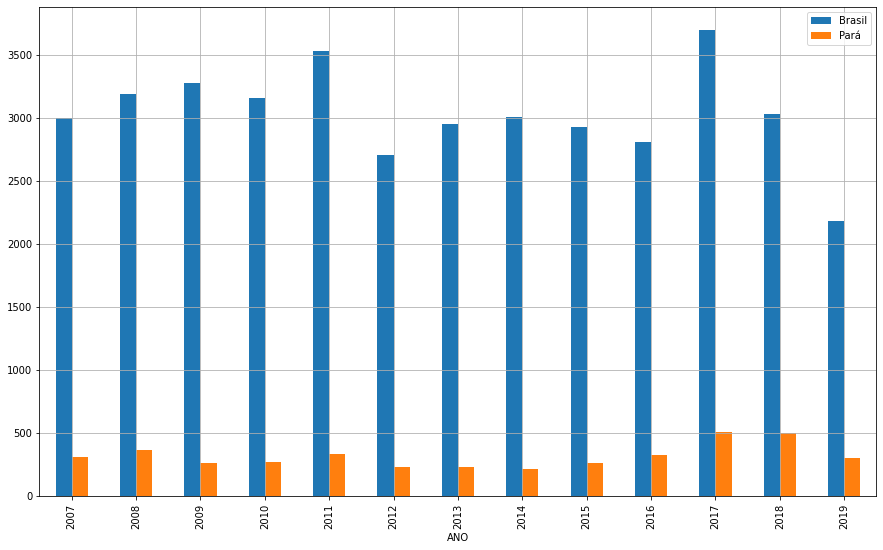

In [15]:
br = temp.groupby('ANO').count().T.copy()
br.index = ['Brasil']
pa = temp.loc[temp.CO_UF_INF == 15, :].groupby('ANO').count().T.copy()
pa.index = ['Pará']
pd.concat([br, pa], axis=0).T.plot(figsize=(15,9), kind='bar', grid=True);

### Ranking da taxa média de incidência do último triênio dos municípios

In [16]:
taxa = pd.read_csv('../data/indicadores/visceral/indicador_15_taxa_incidencia_municipio_infeccao.csv')
taxa = taxa.set_index('CO_MN_INF')

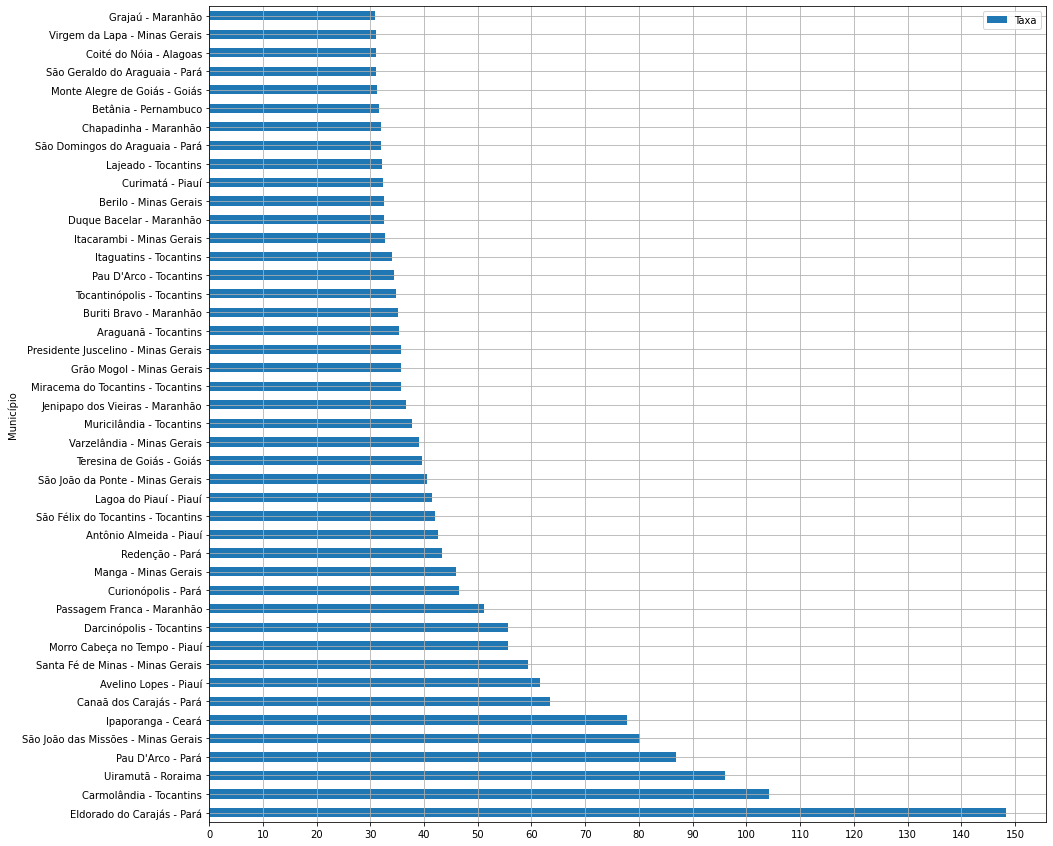

In [17]:
trienio = taxa.loc[:, taxa.columns[-3:]].mean(axis=1).sort_values(ascending=False).to_frame('Taxa')
trienio.index.name = 'Município'
trienio = trienio.loc[trienio.Taxa > 30, :]
trienio.index = trienio.index.astype(int)
trienio.index = trienio.index.map(mun)
trienio.plot(kind='barh', figsize=(15,15), grid=True, xticks=range(0, int(trienio.Taxa.max()) + 10, 10));